# 문제 정의 : 직무 / 경력 / 고용 형태 / 회사 규모에 따른 연봉 비교
#### 사용 분석 방법 : 드릴다운(Drill-down)

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

salary_df = pd.read_csv('salaries.csv')
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Analyst,142000,USD,142000,US,0,US,M
1,2025,MI,FT,Analyst,87000,USD,87000,US,0,US,M
2,2025,SE,FT,Data Quality Lead,218700,USD,218700,US,0,US,M
3,2025,SE,FT,Data Quality Lead,163200,USD,163200,US,0,US,M
4,2025,MI,FT,Data Quality Specialist,121524,USD,121524,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
146343,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
146344,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
146345,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
146346,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


#### 컬럼 설명

- work_year :          급여 보고 연도
- experience_level :   경력 수준 (EN : 신입 MI : 중간 SE : 고급 EX: 관리자)
- employment_type :    고용 계약 유형 (FT : 정규직 CT : 계약직 PT : 파트타임 FL : 프리랜서)
- job_title :          직업 종류
- salary :             연봉
- salary_currency :    급여 지급 통화
- salary_in_usd :      환율 usd로 통일
- employee_residence : 환율 종류
- remote_ratio :       원격 근무의 백분율
- company_location :   회사 또는 고용주의 본사가 있는 국가
- company_size :       회사 크기

## 데이터 이해 및 정리

In [2]:
salary_df.shape

(146348, 11)

#### 고유값 확인 

In [102]:
print(salary_df['experience_level'].value_counts())

experience_level
SE    84659
MI    44410
EN    13466
EX     3813
Name: count, dtype: int64


In [104]:
print(salary_df['company_size'].value_counts())

company_size
M    142292
L      3839
S       217
Name: count, dtype: int64


In [105]:
print(salary_df['remote_ratio'].value_counts())

remote_ratio
0      115595
100     30425
50        328
Name: count, dtype: int64


(0.0, 800000.0)

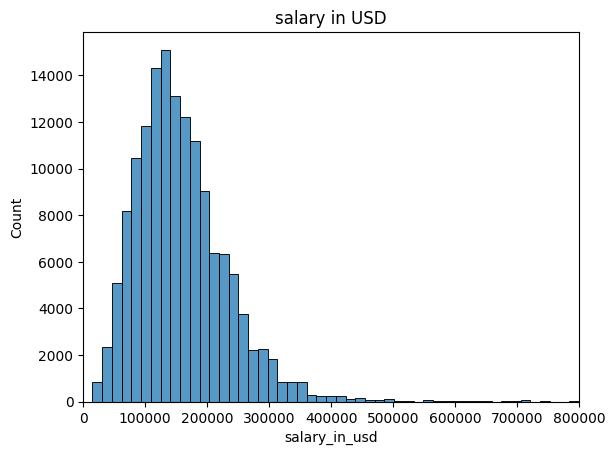

In [118]:
sns.histplot(salary_df['salary_in_usd'],bins=50)
plt.title('salary in USD')
plt.xlim(0,800000)

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

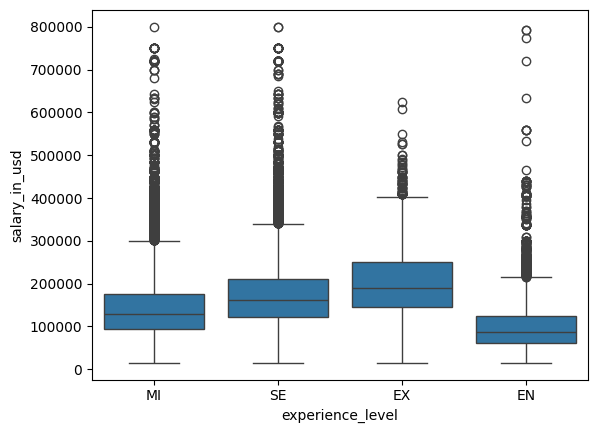

In [114]:
sns.boxplot(data=salary_df, x = 'experience_level', y='salary_in_usd')

EX(관리자)의 연봉은 평균이 매우 높지만 데이터 수가 적어 이상치의 영항도 큼

<Axes: ylabel='job_title'>

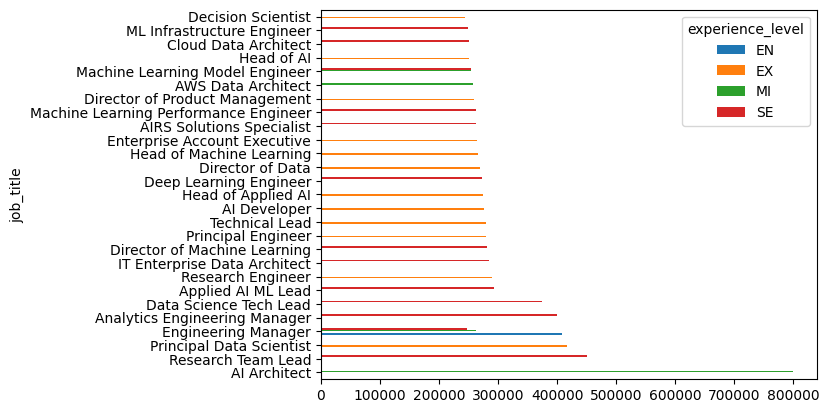

In [126]:
# 경력별 연봉 차이
salary_df.groupby(['job_title','experience_level'])['salary_in_usd'].mean().sort_values(ascending=False).head(30).unstack().plot(kind='barh')

1. EX, SE, MI, EN 순으로 연봉 차이가 큼 (경력 상승이 연봉상승에 직접적 연결됨)
2. 고경력자가 상위 연봉을 차지하는 경우도 많이 볼 수 있고 신입도 연봉 상위에 있는 경우가 있음
3. 연봉 상위 30개의 직업중 AI 중심 직무의 비율이 매우 높아 AI 관련 직무의 시장 가치가 매우 높다는 것을 알 수 있음.

In [3]:
salary_df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
group_SE = salary_df[salary_df['experience_level'] == 'SE']
group_MI = salary_df[salary_df['experience_level'] == 'MI']
group_EX = salary_df[salary_df['experience_level'] == 'EX']
group_EN = salary_df[salary_df['experience_level'] == 'EN']

In [6]:
print(group_SE.shape)
print(group_MI.shape)
print(group_EX.shape)
print(group_EN.shape)

(84659, 11)
(44410, 11)
(3813, 11)
(13466, 11)


In [7]:
group_SE.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,2025,SE,FT,Data Quality Lead,218700,USD,218700,US,0,US,M
3,2025,SE,FT,Data Quality Lead,163200,USD,163200,US,0,US,M
10,2025,SE,FT,Machine Learning Engineer,166000,USD,166000,US,0,US,M
11,2025,SE,FT,Machine Learning Engineer,114000,USD,114000,US,0,US,M
14,2025,SE,FT,Machine Learning Engineer,256500,USD,256500,US,100,US,M


## 단순 비교

In [37]:
# 신입 연봉 비교
pd.DataFrame(group_EN.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)).head(20)

,salary_in_usd
job_title,
Engineering Manager,407560.000000
Head of Data,240500.000000
Director,204718.000000
AI Researcher,203643.636364
Quantitative Researcher,197000.000000
Research Scientist,192503.714286
Software Architect,190000.000000
Machine Learning Model Engineer,180000.000000
Architect,170837.500000


In [9]:
#고급 인력 연봉 비교
pd.DataFrame(group_SE.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)).head(7)

,salary_in_usd
job_title,
Research Team Lead,450000.000000
Analytics Engineering Manager,399880.000000
Data Science Tech Lead,375000.000000
Applied AI ML Lead,292500.000000
IT Enterprise Data Architect,284090.000000
Director of Machine Learning,281616.666667
Deep Learning Engineer,272374.000000


In [10]:
# 관리자 연봉 비교
pd.DataFrame(group_EX.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)).head(7)

,salary_in_usd
job_title,
Principal Data Scientist,416000.0
Research Engineer,290000.0
Principal Engineer,280000.0
Technical Lead,280000.0
AI Developer,276000.0
Head of Applied AI,273875.0
Director of Data,270000.0


#### 해석

1. 신입 테이블에 관리자, 책임자가 있는 것으로 보아 경력이 많지만 신입으로 분류된 데이터가 있을 가능성 多
2. 신입 테이블에 책임자, 관리자를 제외한 순위를 보면 연구원, ai 관련 직업이 많음 (석,박사 학위가 많기 때문으로 해석됨)
3. SE(고급) 테이블의 상위 연봉이 EX(관리자)의 상위 연봉보다 높은데 관리자의 데이터가 부족해 평균 왜곡 가능성이 있음      
   혹은 실제로 관리자가 코딩/모델링에 참여하지 않기 때문에 기술력측면에서 고급 엔지니어보다 연봉이 낮게 책정될 가능성이 있음

### 고급 인력 테이블 살펴보기

In [11]:
# FT : 정규직 CT : 계약직 PT : 파트타임 FL : 프리랜서
group_SE_FT = group_SE[group_SE['employment_type'] == 'FT']
group_SE_CT = group_SE[group_SE['employment_type'] == 'CT']
group_SE_PT = group_SE[group_SE['employment_type'] == 'PT']
group_SE_FL = group_SE[group_SE['employment_type'] == 'FL']

In [12]:
print(group_SE_FT.shape)
print(group_SE_CT.shape)
print(group_SE_PT.shape)
print(group_SE_FL.shape)

(84452, 11)
(145, 11)
(56, 11)
(6, 11)


In [13]:
group_SE_FT['employee_residence'].value_counts()

employee_residence
US    77384
CA     3260
GB     1620
DE      197
AU      194
      ...  
CF        2
RU        1
OM        1
SA        1
MD        1
Name: count, Length: 66, dtype: int64

In [14]:
group_SE_CT['employee_residence'].value_counts()

employee_residence
US    114
IN      8
CA      5
FR      5
BR      2
LT      2
AU      2
MX      2
GB      2
EG      2
PL      1
Name: count, dtype: int64

In [15]:
group_SE_PT['employee_residence'].value_counts()

employee_residence
US    46
CA     6
GB     2
DE     1
AE     1
Name: count, dtype: int64

In [16]:
group_SE_FL['employee_residence'].value_counts()

employee_residence
NG    2
CZ    1
IN    1
UA    1
RU    1
Name: count, dtype: int64

#### 해석
1. 미국의 경우 At-will 고용법이 있어 해고가 자유롭기 때문에 정규직의 비율이 많음 (그 외에는 데이터 수가 너무 적어 해석 x)
2. 데이터는 적지만 상위권에 해당하는 나라를 보면 정규직 자체가 보호받는 국가들이 많음
3. 데이터 수집을 미국 기준으로 한 것 같음

In [17]:
# 고급 중에서 계약직의 직업별 연봉 평균
pd.DataFrame(group_SE_CT.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).tail(5))


,salary_in_usd
job_title,
Data Developer,110860.000000
Staff Data Scientist,105000.000000
Analyst,85583.333333
Machine Learning Engineer,38000.000000
Artificial Intelligence Engineer,30000.000000


In [18]:
pd.DataFrame(group_SE_CT['job_title'] == 'Finance Data Analyst').value_counts()

job_title
False        144
True           1
Name: count, dtype: int64

In [19]:
pd.DataFrame(group_SE_CT['job_title'] == 'Machine Learning Engineer')

,job_title
276,False
277,False
2070,False
2071,False
2465,False
...,...
134220,False
141076,False
142419,False
145306,False


In [66]:
group_SE_CT_D = pd.DataFrame(group_SE_CT.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False))
group_SE_CT_D.head(10)

,salary_in_usd
job_title,
Finance Data Analyst,323905.000000
Technical Writer,300000.000000
Manager,165000.000000
Data Architect,160000.000000
AI Engineer,153344.714286
Software Engineer,144071.428571
QA Engineer,140000.000000
Architect,131333.333333
Engineer,131214.285714


In [67]:
group_SE_CT_D.describe()

,salary_in_usd
count,20.000000
mean,137333.713853
std,69007.619573
min,30000.000000
25%,113703.386364
50%,129026.000000
75%,146389.750000
max,323905.000000


In [68]:
# 고급 중에서 정규직의 직업별 연봉 평균
group_SE_FT_D = pd.DataFrame(group_SE_FT.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False))
group_SE_FT_D.head(10)

,salary_in_usd
job_title,
Research Team Lead,450000.000000
Analytics Engineering Manager,399880.000000
Data Science Tech Lead,375000.000000
Applied AI ML Lead,292500.000000
IT Enterprise Data Architect,284090.000000
Director of Machine Learning,281616.666667
Deep Learning Engineer,272374.000000
AIRS Solutions Specialist,263250.000000
Machine Learning Performance Engineer,262500.000000


In [70]:
group_SE_FT_D.describe()

,salary_in_usd
count,330.000000
mean,149955.942239
std,52193.019736
min,23649.000000
25%,119842.968750
50%,149211.700658
75%,180867.955882
max,450000.000000


In [71]:
# 고급 중에서 파트타임 직업의 직업별 연봉 평균
group_SE_PT_D = pd.DataFrame(group_SE_PT.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False))
group_SE_PT_D.head()

,salary_in_usd
job_title,
Machine Learning Engineer,225000.000000
Architect,189100.000000
Software Engineer,185817.333333
Engineer,172500.000000
Statistician,142400.000000


In [72]:
group_SE_PT_D.describe()

,salary_in_usd
count,16.000000
mean,113591.192708
std,55789.422426
min,40000.000000
25%,72132.250000
50%,97351.500000
75%,149925.000000
max,225000.000000


In [73]:
# 고급 중에서 프리랜서의 직업별 연봉 평균
group_SE_FL_D = pd.DataFrame(group_SE_FL.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False))
group_SE_FL_D.head()

,salary_in_usd
job_title,
Backend Engineer,61333.0
Computer Vision Engineer,60000.0
Machine Learning Developer,60000.0
Machine Learning Researcher,50000.0
Software Data Engineer,50000.0


In [74]:
group_SE_FL_D.describe()

,salary_in_usd
count,6.000000
mean,52891.166667
std,9735.420041
min,36014.000000
25%,50000.000000
50%,55000.000000
75%,60000.000000
max,61333.000000


#### 해석
1. 고급 인력의 경우 정규직으로 근무하는 것이 대부분의 직업에서 가장 평균 연봉이 높음.
2. 정규직 평균 연봉이 가장 높지만 연봉의 폭도 가장 큼.

### 신입 경력 테이블 살펴보기

In [29]:
#FT : 정규직 CT : 계약직 PT : 파트타임 FL : 프리랜서
group_EN_FT = group_EN[group_EN['employment_type'] == 'FT']
group_EN_CT = group_EN[group_EN['employment_type'] == 'CT']
group_EN_PT = group_EN[group_EN['employment_type'] == 'PT']
group_EN_FL = group_EN[group_EN['employment_type'] == 'FL']

In [30]:
print(group_EN_FT.shape)
print(group_EN_CT.shape)
print(group_EN_PT.shape)
print(group_EN_FL.shape)

(13104, 11)
(128, 11)
(230, 11)
(4, 11)


In [64]:
group_EN_FT_D = pd.DataFrame(group_EN_FT.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False))
group_EN_FT_D

,salary_in_usd
job_title,
Engineering Manager,407560.0
Head of Data,240500.0
AI Researcher,218008.0
Director,204718.0
Quantitative Researcher,197000.0
...,...
Data Quality Engineer,23753.0
Web Developer,22584.0
Data Analytics Engineer,20000.0


In [52]:
group_EN_FT_D.describe()

,salary_in_usd
count,183.000000
mean,91532.769563
std,46567.682629
min,18000.000000
25%,58559.833333
50%,85104.411765
75%,112851.428571
max,407560.000000


In [62]:
group_EN_CT_D = pd.DataFrame(group_EN_CT.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False))
group_EN_CT_D

,salary_in_usd
job_title,
BI Analyst,129000.000000
Business Data Analyst,100000.000000
Data Scientist,93692.750000
AI Research Scientist,88888.000000
Product Data Analyst,83200.000000
Software Engineer,81440.000000
Data Engineer,74019.200000
Data Analyst,72452.114754
Analyst,63808.000000


In [54]:
group_EN_CT_D.describe()

,salary_in_usd
count,17.000000
mean,64546.984201
std,29514.587957
min,16000.000000
25%,44753.000000
50%,63808.000000
75%,83200.000000
max,129000.000000


In [55]:
group_EN_FL_D = pd.DataFrame(group_EN_FL.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False))
group_EN_FL_D

,salary_in_usd
job_title,
Machine Learning Engineer,100000.0
AI Researcher,60000.0
Data Analytics Consultant,50000.0
Applied Data Scientist,30000.0


In [75]:
group_EN_FL_D.describe()

,salary_in_usd
count,4.000000
mean,60000.000000
std,29439.202888
min,30000.000000
25%,45000.000000
50%,55000.000000
75%,70000.000000
max,100000.000000


### 해석
1. 연봉비율은 고급인력이나 신입인력이나 비슷함.
2. 프리랜서들은 정규직의 최저 연봉을 받는 사람들보다는 평균적으로 높지만
   최고 연봉을 받는 사람들보다는 현저히 낮음. (최저 연봉을 받는 사람들에게는 프리랜서를 고민해보는게 나쁘지 않아보임)

### 회사 크기별 연봉 차이 알아보기

In [76]:
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Analyst,142000,USD,142000,US,0,US,M
1,2025,MI,FT,Analyst,87000,USD,87000,US,0,US,M
2,2025,SE,FT,Data Quality Lead,218700,USD,218700,US,0,US,M
3,2025,SE,FT,Data Quality Lead,163200,USD,163200,US,0,US,M
4,2025,MI,FT,Data Quality Specialist,121524,USD,121524,US,0,US,M


In [78]:
salary_df['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [79]:
salary_CS_M = salary_df[salary_df['company_size']== 'M']
salary_CS_L = salary_df[salary_df['company_size']== 'L']
salary_CS_S = salary_df[salary_df['company_size']== 'S']

In [80]:
print(salary_CS_M.shape)
print(salary_CS_L.shape)
print(salary_CS_S.shape)

(142292, 11)
(3839, 11)
(217, 11)


In [91]:
salary_CS_M_D = pd.DataFrame(salary_CS_M.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False))
salary_CS_M_D.head(10)

,salary_in_usd
job_title,
Research Team Lead,450000.000000
Finance Data Analyst,323905.000000
Applied AI ML Lead,292500.000000
Head of Machine Learning,278312.500000
Head of Applied AI,273875.000000
Director of Data,270000.000000
AIRS Solutions Specialist,263250.000000
Machine Learning Performance Engineer,262500.000000
Director of Product Management,259155.535714


In [92]:
salary_CS_M_D.describe()

,salary_in_usd
count,367.000000
mean,136999.061000
std,54232.505630
min,15000.000000
25%,99851.500000
50%,135170.000000
75%,170362.276394
max,450000.000000


In [93]:
salary_CS_L_D = pd.DataFrame(salary_CS_L.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False))
salary_CS_L_D.head(10)

,salary_in_usd
job_title,
Analytics Engineering Manager,399880.000000
Data Science Tech Lead,375000.000000
IT Enterprise Data Architect,284090.000000
AWS Data Architect,258000.000000
Cloud Data Architect,250000.000000
Software Architect,249000.000000
Product Designer,244750.000000
Data Analytics Lead,241700.000000
Member of Technical Staff,224466.666667


In [94]:
salary_CS_L_D.describe()

,salary_in_usd
count,169.000000
mean,116819.705110
std,63780.651681
min,17888.000000
25%,73029.000000
50%,110833.333333
75%,159817.861635
max,399880.000000


In [95]:
salary_CS_S_D = pd.DataFrame(salary_CS_S.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False))
salary_CS_S_D.head(10)

,salary_in_usd
job_title,
Principal Data Scientist,416000.0
AI Data Scientist,200000.0
Associate,200000.0
BI Analyst,200000.0
Marketing Data Analyst,200000.0
Staff Data Analyst,179998.0
Cloud Data Engineer,160000.0
Machine Learning Scientist,149959.0
AI Developer,147246.0


In [96]:
salary_CS_S_D.describe()

,salary_in_usd
count,60.000000
mean,93400.539306
std,62115.831795
min,27777.000000
25%,53880.750000
50%,73500.000000
75%,118235.250000
max,416000.000000


In [ ]:
#### 해석
1. 컴퓨터 관련 직무는 대기업보다 중견기업에서 평균 연봉이 더 높게 나옴.